## Mathematical statistics. Математическая статистика

There are base functions implemented in this notebook count such values as
$${\tt} moda$$
$${\tt} mediana$$
$${\tt} mean$$
$${\tt} deviation$$

Also there is the function which counts the cumulative distribution function of given values and draws the probability distibution

In [18]:
from IPython.display import display, Math, Latex

\begin{align}
Moda & = \left\{x_{i}: p(x_i)>p(x_j), j\in[1..n], j\neq i\right\} \\
Mediana = Me & = \left\{x: P(X < Me)=P(X>Me)\right\} \\
Mean = m_x & = \sum_{i=1}^n(x_{i}*p_{i}) \\
Deviation = d_x & = \sum_{i=1}^n(x_{i}-m_{x})^2*p_{i} \\
\end{align}


### Implementation 

In [19]:
import random as rm
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [20]:
def getModa(array): 
    array = np.asarray(sorted(array))
    n = len(array)
    visited = [False for i in range(n)] 
    count = np.zeros(n)
    
    for i in range(n): 
        if (visited[i] == True): 
            continue;
        count[i] = 1
        for j in range(i + 1, n, 1): 
            if (array[i] == array[j]): 
                visited[j] = True
                count[i] += 1   

    m = max(count)
    ind = [i for i, v in enumerate(array.tolist()) if count[i] == m]
    return array[ind]

def getDeviation(array, mean):
    deviation = 0
    for x in array:
        deviation += (x-mean)**2    
    deviation /= len(array)
    return deviation
        
def getDistCharacteristics(array):
    n = len(array)
    deviation = 0
    mean = 0
    mediana = 0
    moda = 0
    for x in array:
        mean += x    
    mean /= n
    deviation = getDeviation(array, mean)
    if n % 2 == 1:
        mediana = sorted(array)[int(n/2)]
    else:
        mediana = (sorted(array)[int(n/2)]+sorted(array)[int(n/2 - 1)])/2
    moda = getModa(array)
    
    return mediana, mean, moda, deviation   
        

### Test data

In [21]:
t = np.array([10, 20, 20, 5, 5, 20, 5, 20])
print('mediana, moda, mean, deviation')
getDistCharacteristics(t)

mediana, moda, mean, deviation


(15.0, 13.125, array([20]), 49.609375)

### Cumulative distribution function. Функция распределения

In [22]:
def getCDF(array): #F(X) = cumulative distribution function (CDF)
    x = np.asarray(sorted(array))
    n = len(array)
    visited = [False for i in range(n)] 
    count = np.zeros(n)
    
    for i in range(n): 
        if (visited[i] == True): 
            continue;
        count[i] = 1
        for j in range(i + 1, n, 1): 
            if (x[i] == x[j]): 
                visited[j] = True
                count[i] += 1  
                
    _x = np.unique(x)
    _count = count[count != 0]
    _p = []
    _prob = 0
    _nExperiments = sum(count) 
    for i in np.arange(len(_x)):
        _prob += _count[i]/_nExperiments
        _p.append(_prob)
    return np.array(_x), np.array(_p)

In [23]:
const_title = 'Probability Distribution F(X) '

In [24]:
def drawStepFunction(x,y, title='', bPrint=True):
    _y_offset = 0.1
    _x_offset = 1
    
    _len = len(x)*2
    _x = np.zeros(_len)
    _y = np.zeros(_len)
    for i in np.arange(len(x)):
        _x[i*2] = x[i]
        _x[i*2-1] = x[i]
        _y[i*2] = y[i]
        _y[i*2+1]= y[i]
    _x[-1] = _x[-2]+_x_offset
    
    _lx = list(_x)
    _ly = list(_y)
    _lx.insert(0, min(_x))
    _ly.insert(0, 0)
    _lx.insert(0, min(_x)-_x_offset)
    _ly.insert(0, 0)
    
    _x = np.asarray(_lx)
    _y = np.asarray(_ly)
    plt.plot(_x,_y)  
    plt.title(const_title + title)
    plt.xlim([min(_x)-_x_offset,_x[-1]])
    plt.ylim([min(min(_y), 0),max(_y)+_y_offset])

    plt.show()


In [25]:
def getProbabilityDistribution(array, title='', bPrint=True):
    args, cdf = getCDF(array)
    if bPrint == True:
        print(args, cdf)
    drawStepFunction(args, cdf, title, bPrint)

In [26]:
def getAndDraw(array, title='', bPrint=True):
    getProbabilityDistribution(array, title, bPrint)
    mediana, mean, moda, deviation = getDistCharacteristics(array)
    print ("mean = ", mean)
    print ("standart deviation = ", deviation**0.5)
    print ("---------- ------------- ------------")

### Test data

[ 5 10 20] [ 0.5    0.625  1.   ]


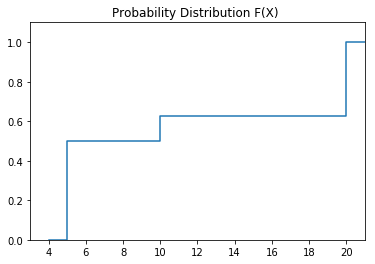

mean =  11.25
standart deviation =  6.95970545354
---------- ------------- ------------


In [27]:
array = np.array([10, 20, 5, 5, 5, 20, 5, 20])

getAndDraw(array, '', True)

### Load real data

In [28]:
mos_obl = pd.read_csv("mos_obl_2018.csv")
altay = pd.read_csv("altay_2018.csv")

In [29]:
altay.head()
mos_obl.head()

,UIK,voters,voted mobile,voted stationary,Turnout,Video
0,1,1963,78,1048,0.573612,1
1,2,2018,121,1445,0.776016,1
2,3,1869,80,1062,0.611022,0
3,4,1865,89,984,0.575335,1
4,5,1870,72,1242,0.702674,0


# Задачи
*В письме приложено два csv-файла: altay_2018.csv и
mos_obl_2018.csv, представляющие собой часть результатов
выборов губернаторов в алтайской и московской областях.
Столбцы соответствуют следующим данным: UIK – номер
участкового избирательного участка; TIK – название
территориальной избирательной комиссии; voters –
зарегистрированное число избирателей; voted mobile – количество
проголосовавших на выездном голосовании; voted stationary -
количество проголосовавших непосредственно на участке; turnout
– явка = (voted mobile + voted stationary)/ voters; video – индикатор
наличия видеонаблюдения на участке (1 – есть, 0 - нет). <br> <br>*
Для обоих областей построить распределение явки (turnout)
отдельно для участков с видеонаблюдением и для участков без
такового. Найти математическое ожидание для каждой из выборок
и среднеквадратичное отклонение. <br> <br>
Проделать то же самое, дополнительно разделив каждую
выборку по признаку числа избирателей: voters > 1000 и
voters < 1000. Т.е. рассмотреть для каждой области четыре выборки
{video = 1, voters > 1000}, {video = 0, voters > 1000}, {video = 1,
voters < 1000}, {video = 0, voters < 1000}.  <br> <br>
[Материалы Тимура о распределении с формулами](https://mail.google.com/mail/u/0?ui=2&ik=7e633e38b7&attid=0.1&permmsgid=msg-f:1627197538608941688&th=1694f78a442d0a78&view=att&disp=safe)

In [30]:
interest = 'Turnout'

In [31]:
#выборки
mos_video_on = mos_obl[mos_obl['Video']==1][interest]
mos_video_off = mos_obl[mos_obl['Video']==0][interest]

altay_video_on = altay[altay['Video']==1][interest]
altay_video_off = altay[altay['Video']==0][interest]

mos_video_on_many = mos_obl[(mos_obl['Video']==1) & (mos_obl['voters']>1000)][interest]
mos_video_on_few = mos_obl[(mos_obl['Video']==1) & (mos_obl['voters']<1000)][interest]
mos_video_off_many = mos_obl[(mos_obl['Video']==0) & (mos_obl['voters']>1000)][interest]
mos_video_off_few = mos_obl[(mos_obl['Video']==0) & (mos_obl['voters']<1000)][interest]

alt_video_on_many = altay[(altay['Video']==1) & (altay['voters']>1000)][interest]
alt_video_on_few = altay[(altay['Video']==1) & (altay['voters']<1000)][interest]
alt_video_off_many = altay[(altay['Video']==0) & (altay['voters']>1000)][interest]
alt_video_off_few = altay[(altay['Video']==0) & (altay['voters']<1000)][interest]


In [32]:
bPrint = False #Если нужно вывести значения функции распределения, то bPrint = True

### Московская область

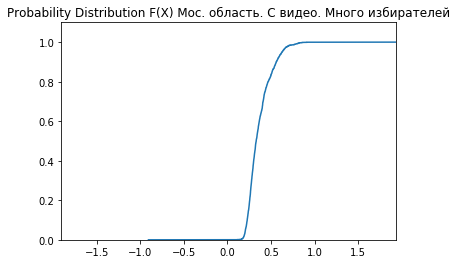

mean =  0.365398392091
standart deviation =  0.132721604541
---------- ------------- ------------


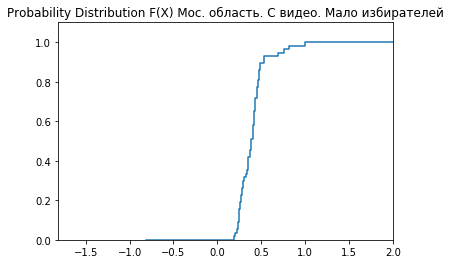

mean =  0.395097191734
standart deviation =  0.148432108824
---------- ------------- ------------


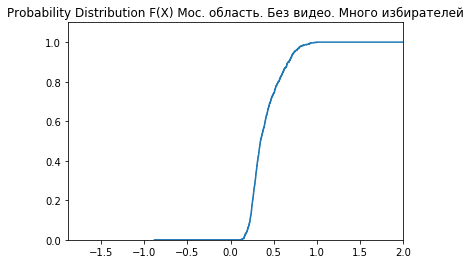

mean =  0.402430356474
standart deviation =  0.173537618685
---------- ------------- ------------


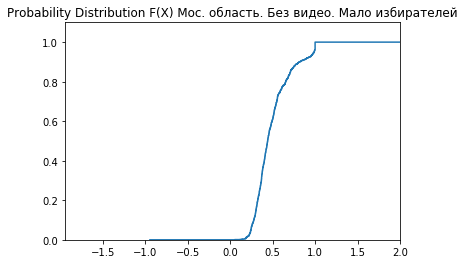

mean =  0.493575967047
standart deviation =  0.207518330772
---------- ------------- ------------


In [33]:
getAndDraw(mos_video_on_many, 'Мос. область. С видео. Много избирателей', bPrint)
getAndDraw(mos_video_on_few, 'Мос. область. С видео. Мало избирателей', bPrint)
getAndDraw(mos_video_off_many, 'Мос. область. Без видео. Много избирателей', bPrint)
getAndDraw(mos_video_off_few, 'Мос. область. Без видео. Мало избирателей', bPrint)

### Алтай

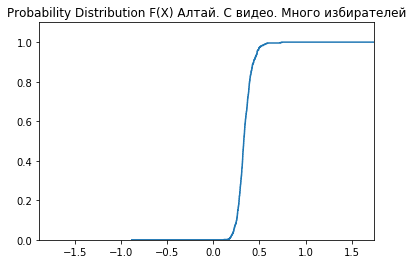

mean =  0.33972591577
standart deviation =  0.0777264450124
---------- ------------- ------------


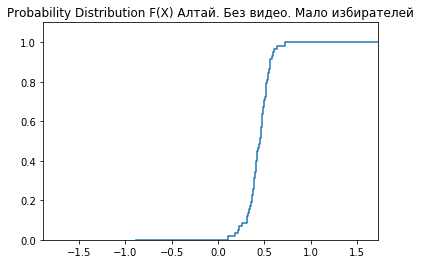

mean =  0.441261763122
standart deviation =  0.112264464834
---------- ------------- ------------


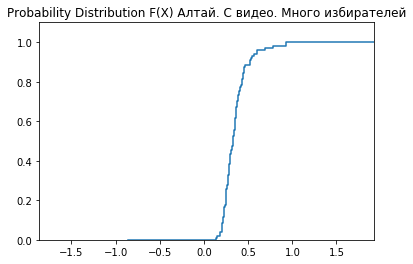

mean =  0.35053861029
standart deviation =  0.141197569513
---------- ------------- ------------


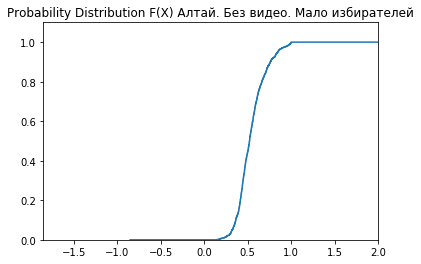

mean =  0.541186215949
standart deviation =  0.157436562637
---------- ------------- ------------


In [34]:
getAndDraw(alt_video_on_many, 'Алтай. С видео. Много избирателей', bPrint)
getAndDraw(alt_video_on_few, 'Алтай. Без видео. Мало избирателей', bPrint)
getAndDraw(alt_video_off_many, 'Алтай. С видео. Много избирателей', bPrint)
getAndDraw(alt_video_off_few, 'Алтай. Без видео. Мало избирателей', bPrint)

***Вывод/Conclusion*** <br>
Подозрительно высокая явка (мат. ожидание) на участках без видеонаблюдения и увеличенная в 1.7-2 раза среднеквадратичное отклонение по сравнению с участками с видеокамерами.
Тенденции в областях одинаковы. 